# Data science and Business Analytics Internship 

# The Sparks Foundation Internship Nov 21

## Task 2 - Prediction Using Unsupervised ML

In [13]:
# Importing the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [35]:
#load the require iris dataset
iris = datasets.load_iris()
irisdata= pd.DataFrame(iris.data, columns = iris.feature_names)
irisdata

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Exploring The Dataset 

In [3]:
irisdata.shape

(150, 4)

In [4]:
irisdata.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
irisdata.isnull().sum()  # checking the missimg value


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Finding the culster for k Means

In [7]:
#slice the important features
x=irisdata.iloc[:,:].values #values gives array

from sklearn.cluster import KMeans
WCSS=[] 
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=1)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


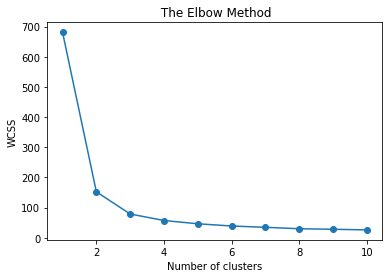

In [8]:
#let's plot the results on line graph, and observe the elbow.
plt.plot(range(1,11),WCSS,marker = "o")
plt.title(" The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Applying kmeans to the Dataset

In [9]:
kmeans=KMeans(n_clusters=3,init="k-means++",
              n_init=10,max_iter=300,random_state=1)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# visualization the cluster

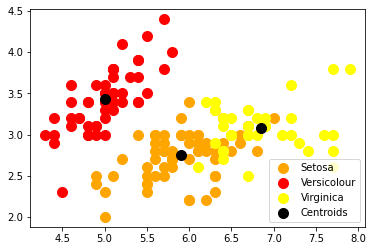

In [10]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="orange",label="Setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="red",label="Versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="yellow",label="Virginica")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c="black",label="Centroids")
plt.legend()
plt.show()

#### from the above graph we see there are three cluster in total which visualized in different colors and the centroid of each cluster is visualized in black color

# Cluster Evaluation

#### Let's evaluate the performance of our clusters.
#### For that I used Silhouette score method.Silhouette score is used to evaluate the quality of clusters using clustering algorithms such as K-means in terms of how well samples are clusterd with other samples that are similar to each other.

In [11]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_kmeans,metric="euclidean")
print("For 3 clusters, Silhouette score is ",score)

For 3 clusters, Silhouette score is  0.5528190123564095


#### As we know Silhouette score vary -1 to 1. When score is 1 that means, the clusters are very dense and nicely separated. So we can say that our clusters are also nicely separated.

# THANK YOU !!